# Background
Marketpro adalah perusahaan penyedia software sales and marketing yang menjual jasanya sebagai software kepada perusahaan lain. Marketpro berupaya meningkatkan pemahamannya tentang kinerja penjualan, perilaku pelanggan, dan tren produk untuk mengembangkan strategi penjangkauan dan penjualan yang efektif.



##Problem Statement & Objective
Untuk membantu tim Business Development Marketpro mengakuisisi klien baru dengan efektif dan efisien, diperlukan adanya Outreach Strategy. Sebagai data analyst, saya diminta untuk menyusuu Outreach Strategy tersebut dengan melakukan:

* Analisis Kinerja Penjualan:
Identifikasi produk, wilayah, dan segmen pelanggan dengan kinerja terbaik.
Tentukan tren dan pola musiman dalam penjualan.

* Analisis Perilaku Pelanggan:
Memahami perilaku pembelian berbagai segmen pelanggan (UKM, Strategis, Perusahaan, dll.). Analisis hubungan antara penawaran diskon dan pembelian pelanggan.

* Popularitas dan Profitabilitas Produk:
Identifikasi produk paling populer dan kontribusinya terhadap penjualan secara keseluruhan. Menilai profitabilitas produk dan segmen pelanggan yang berbeda.

* Dampak Diskon:
Evaluasi pengaruh diskon terhadap volume penjualan dan margin keuntungan.
Identifikasi tingkat diskon optimal yang memaksimalkan keuntungan tanpa mengurangi penjualan secara signifikan.

* Forecasting & Recommendation:
Perkirakan tren penjualan di masa depan berdasarkan data historis.
Memberikan rekomendasi yang dapat ditindaklanjuti kepada tim penjualan dan pemasaran untuk meningkatkan strategi penjangkauan, retensi pelanggan, dan pertumbuhan penjualan.

#Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset SaaS-Sales

###Missing Values Cleaning

In [3]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
(df == '-').sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
(df == ' ').sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date Key'] = df['Date Key'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   object        
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

### Outliers

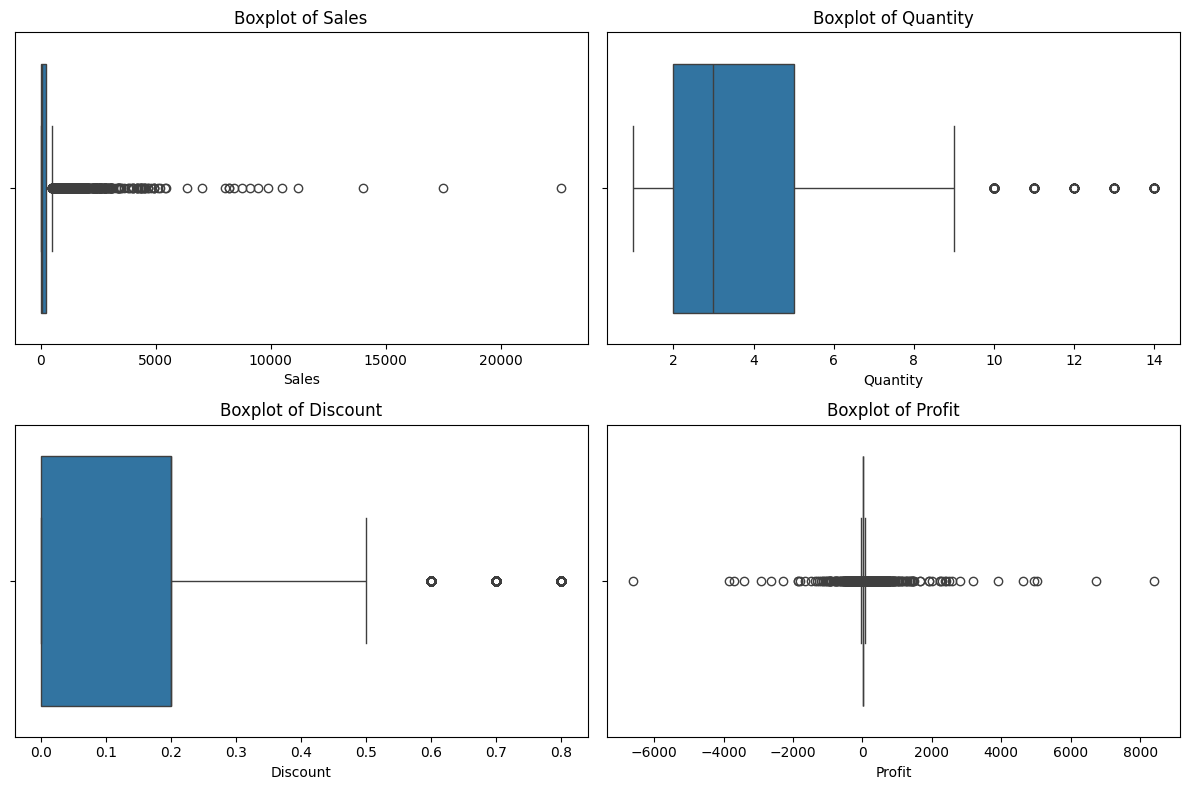

In [9]:
plt.figure(figsize=(12, 8))

# Sales
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')

# Quantity
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')

# Discount
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount')

# Profit
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')

plt.tight_layout()
plt.show()

Berdasarkan Boxplot di atas, terdapat sebaran outliers yang cukup luas untuk kolom sales dan profit.

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

df_normalized = df.copy()
for column in columns:
    df_normalized = remove_outliers(df_normalized, column)

df_normalized

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
6,7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932


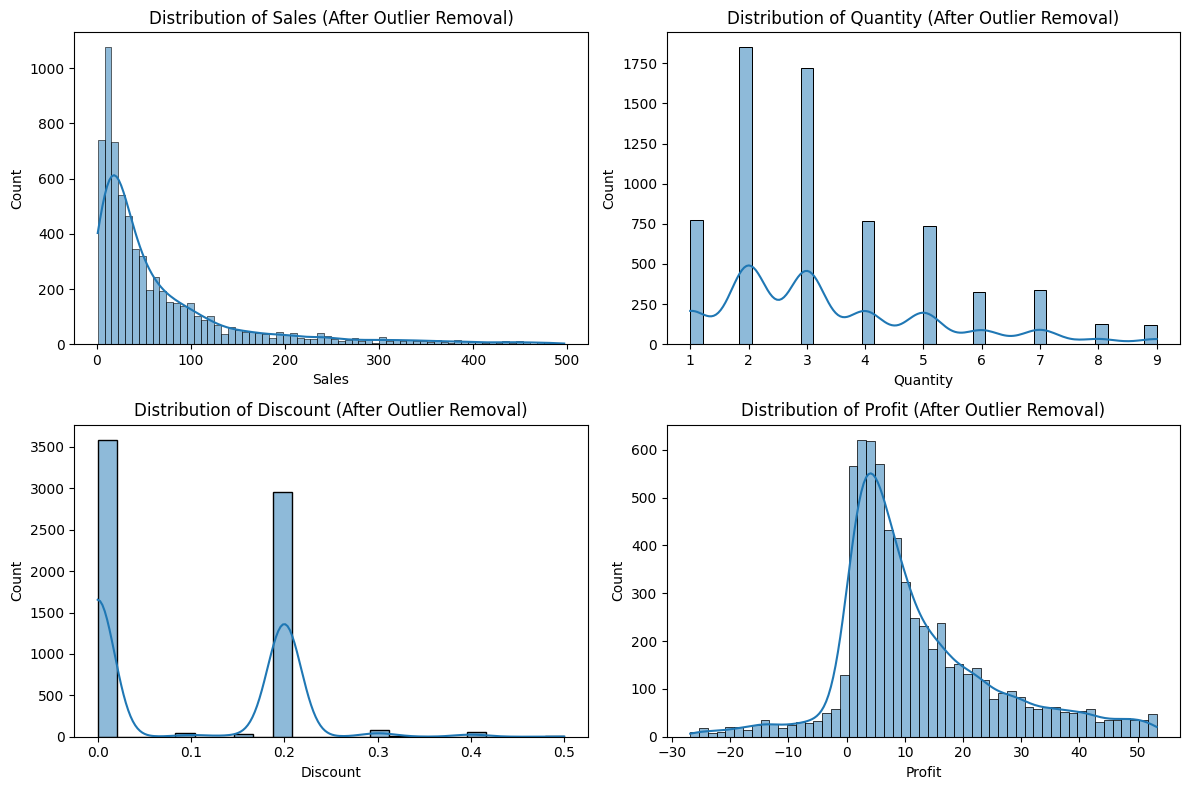

In [12]:
plt.figure(figsize=(12, 8))

# Sales
plt.subplot(2, 2, 1)
sns.histplot(df_normalized['Sales'], kde=True)
plt.title('Distribution of Sales (After Outlier Removal)')

# Quantity
plt.subplot(2, 2, 2)
sns.histplot(df_normalized['Quantity'], kde=True)
plt.title('Distribution of Quantity (After Outlier Removal)')

# Discount
plt.subplot(2, 2, 3)
sns.histplot(df_normalized['Discount'], kde=True)
plt.title('Distribution of Discount (After Outlier Removal)')

# Profit
plt.subplot(2, 2, 4)
sns.histplot(df_normalized['Profit'], kde=True)
plt.title('Distribution of Profit (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [13]:
df_sorted_sales = df.sort_values(by='Sales', ascending=False)
df_sorted_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,2020-03-18,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
6826,6827,APJ-2022-118689,2022-10-03,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,8154,AMER-2023-140151,2023-03-24,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
2623,2624,EMEA-2023-127180,2023-10-23,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888
4190,4191,APJ-2023-166709,2023-11-18,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856


In [14]:
filtered_df = df[df['Product'].str.contains('Big Ol Database')]
filtered_df = filtered_df.sort_values(by='Sales', ascending=False)
filtered_df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,2020-03-18,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
4277,4278,AMER-2022-107440,2022-04-17,20220417,Kevin Wilkins,Argentina,Buenos Aires,AMER,LATAM,Lowes,1060,Retail,Strategic,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818
8488,8489,EMEA-2022-158841,2022-02-02,20220202,Jane Stewart,Spain,Valencia,EMEA,EU-WEST,Honda Motor,1045,Manufacturing,SMB,Big Ol Database,3D2PQROYNM,8749.950,5,0.0,2799.9840
165,166,APJ-2020-139892,2020-09-08,20200908,Melanie Davidson,Japan,Osaka,APJ,JAPN,Nissan Motor,1098,Transportation,SMB,Big Ol Database,SKNAWPG4VV,8159.952,8,0.4,-1359.9920
683,684,EMEA-2023-168116,2023-11-05,20231105,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,5759,EMEA-2021-149300,2021-11-22,20211122,Thomas Hodges,Germany,Hanover,EMEA,EU-WEST,BNP Paribas,1065,Finance,SMB,Big Ol Database,7ZR712T47S,32.985,3,0.5,-1.9791
4823,4824,AMER-2022-140018,2022-11-22,20221122,Evan Ince,Mexico,Mexico City,AMER,LATAM,Banco Santander,1101,Finance,SMB,Big Ol Database,N97KOJE1B5,30.345,7,0.7,-24.2760
7600,7601,EMEA-2020-131947,2020-09-17,20200917,Jonathan Ball,Belgium,Brussels,EMEA,EU-WEST,AmerisourceBergen,1007,Healthcare,SMB,Big Ol Database,1M94F53NWB,29.925,5,0.7,-21.9450
6810,6811,EMEA-2023-156237,2023-09-15,20230915,Lisa Wilkins,France,Paris,EMEA,EU-WEST,Bank of America Corp.,1011,Finance,SMB,Big Ol Database,1RL2P5F3Y0,12.585,1,0.7,-18.0385


Setelah melihat data sales dari penjualan terbesar, dapat dilihat bahwa berdasarkan konteks bisnis, sebaran outliers memang sesuai dengan realitanya.

Untuk proses selanjutnya, data akan dipisah menjadi 2:
* df: data dengan outliers di maintain
* df_normalized: data dengan outliers dibersihkan

#Data Analysis

##Exploratory Data Analysis

In [15]:
display(df.describe(), df.describe(include='object'))

,Row ID,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,29.719388,623.245101,2.225110,0.206452,234.260108


,Order ID,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,20220906,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1



Based on the information in the table, we can conclude the following:

* The total number of units sold is 9994.
* The average sales per order is 229 USD
* The earliest order date was on 2020-01-04 and the
* latest date was 2023-12-31.
* The average discount is 15.6%
* The maximum discount was 80%
* The average profit per order is 28.66. The minimum profit was -6599.98 and the maximum profit was 8399.98.

###Sales Trend

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['YearMonth'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_profit = df.groupby('YearMonth')['Profit'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_profit.index = monthly_profit.index.to_timestamp()

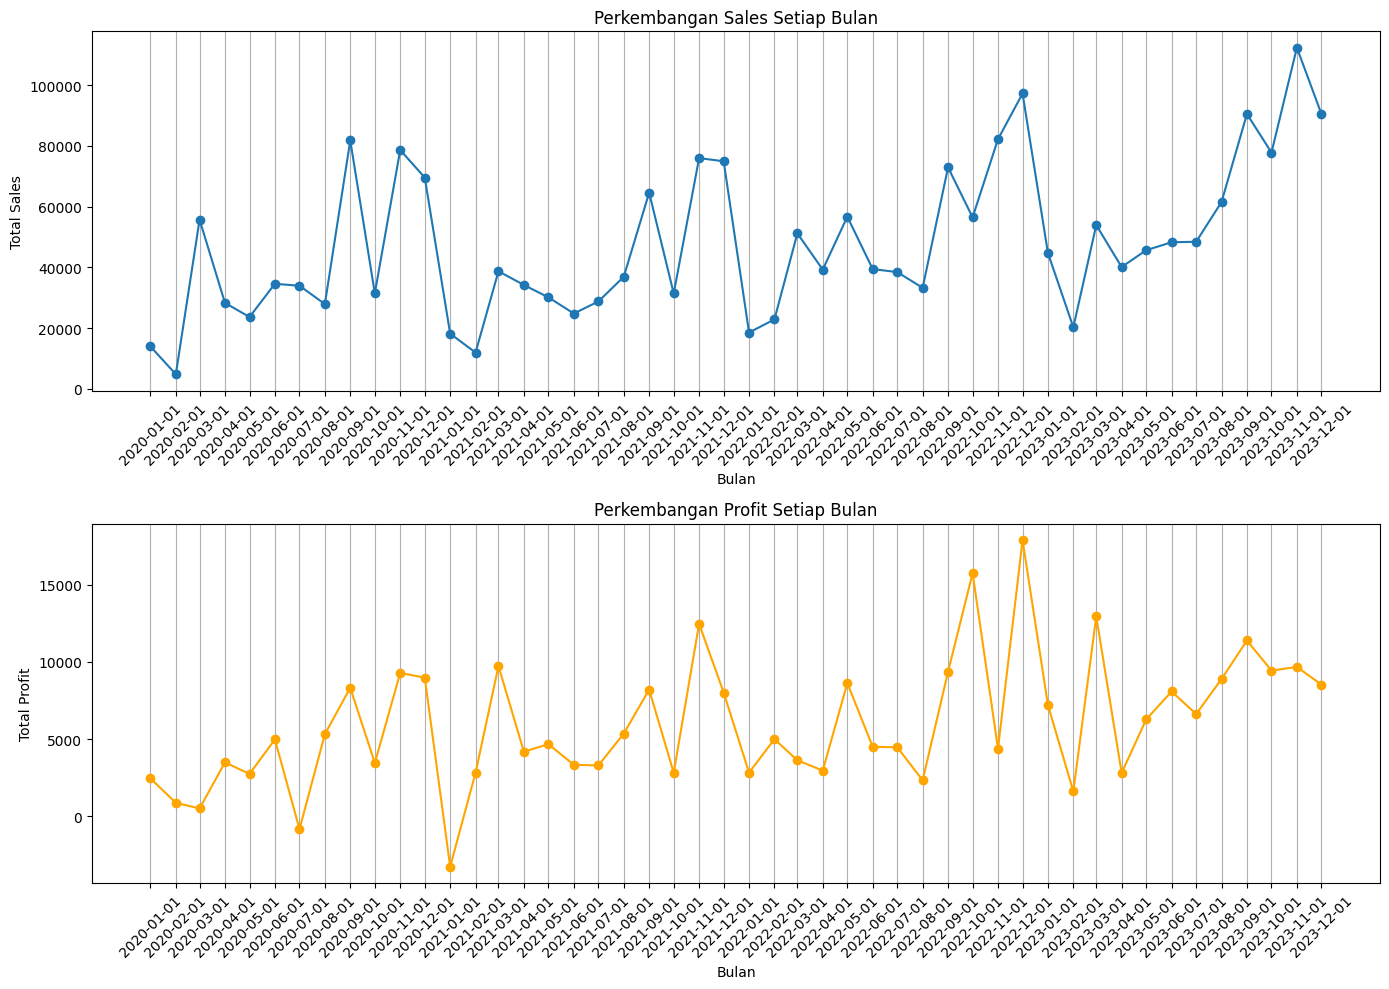

In [17]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(monthly_sales.index, monthly_sales, marker='o')
plt.title('Perkembangan Sales Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.grid(True, axis='x')
plt.xticks(monthly_sales.index, rotation=45)

plt.subplot(2, 1, 2)
plt.plot(monthly_profit.index, monthly_profit, marker='o', color='orange')
plt.title('Perkembangan Profit Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Profit')
plt.grid(True, axis='x')
plt.xticks(monthly_profit.index, rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-18-1e187460caa5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(monthly_sales.index.astype(str), rotation=45, ha='right')


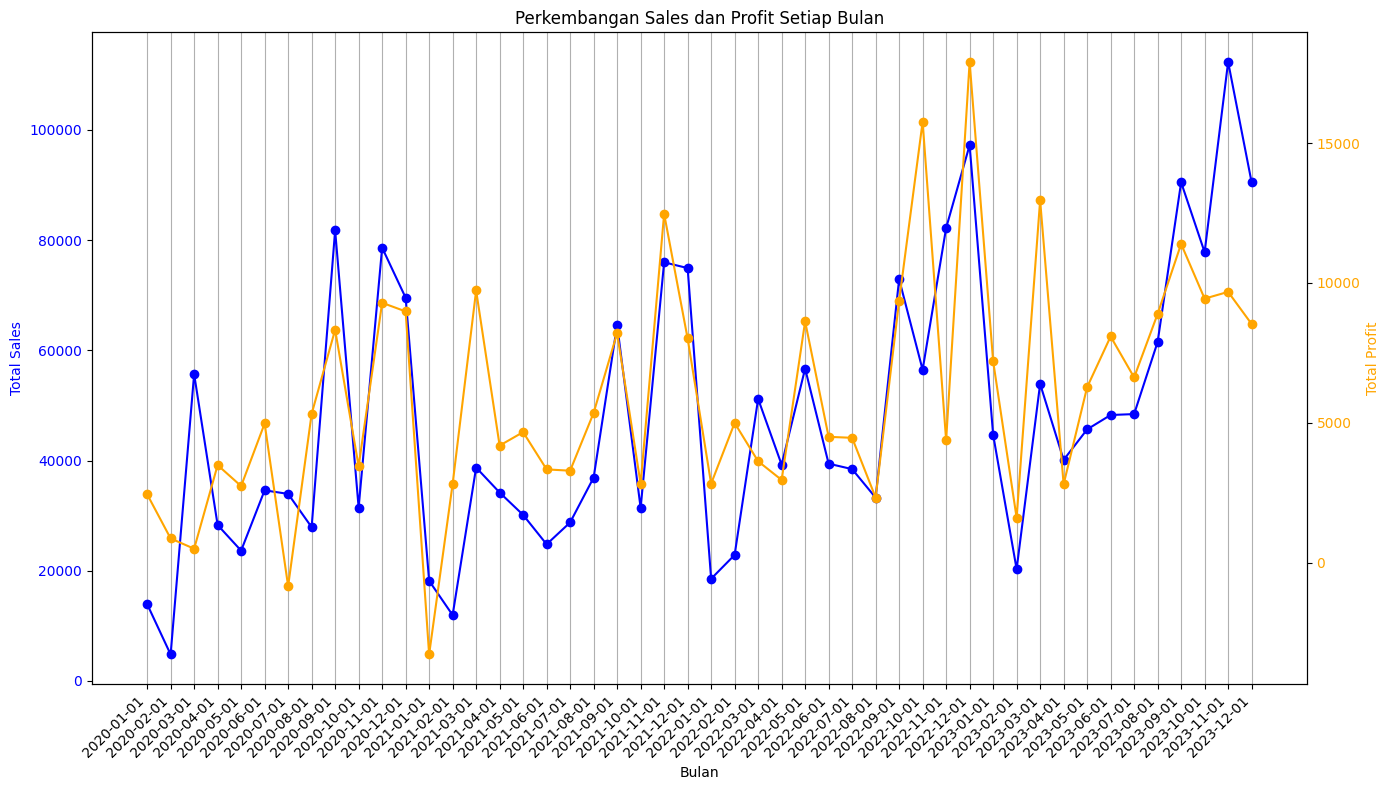

In [18]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(monthly_sales.index.astype(str), monthly_sales, color='b', marker='o', label='Total Sales')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales.index.astype(str), rotation=45, ha='right')
ax1.grid(True, which='both', axis='x')

ax2 = ax1.twinx()
ax2.plot(monthly_profit.index.astype(str), monthly_profit, color='orange', marker='o', label='Total Profit')
ax2.set_ylabel('Total Profit', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Perkembangan Sales dan Profit Setiap Bulan')
fig.tight_layout()
plt.show()

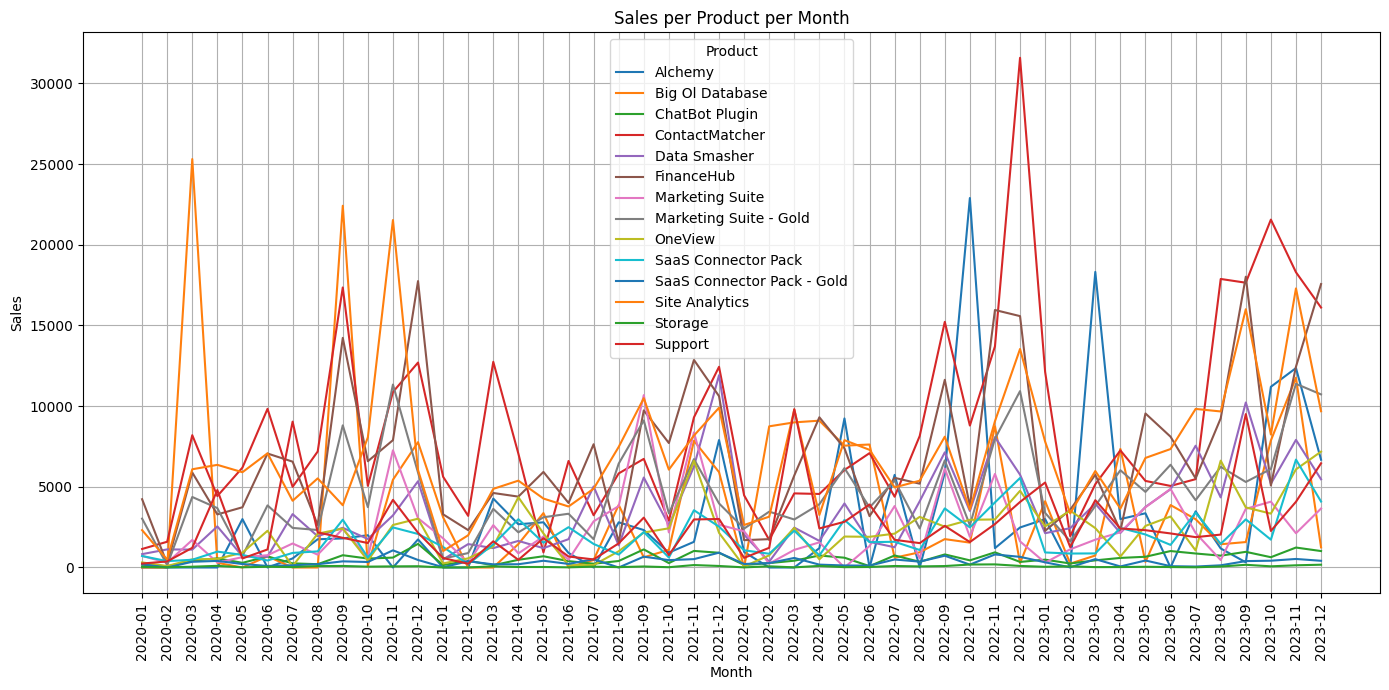

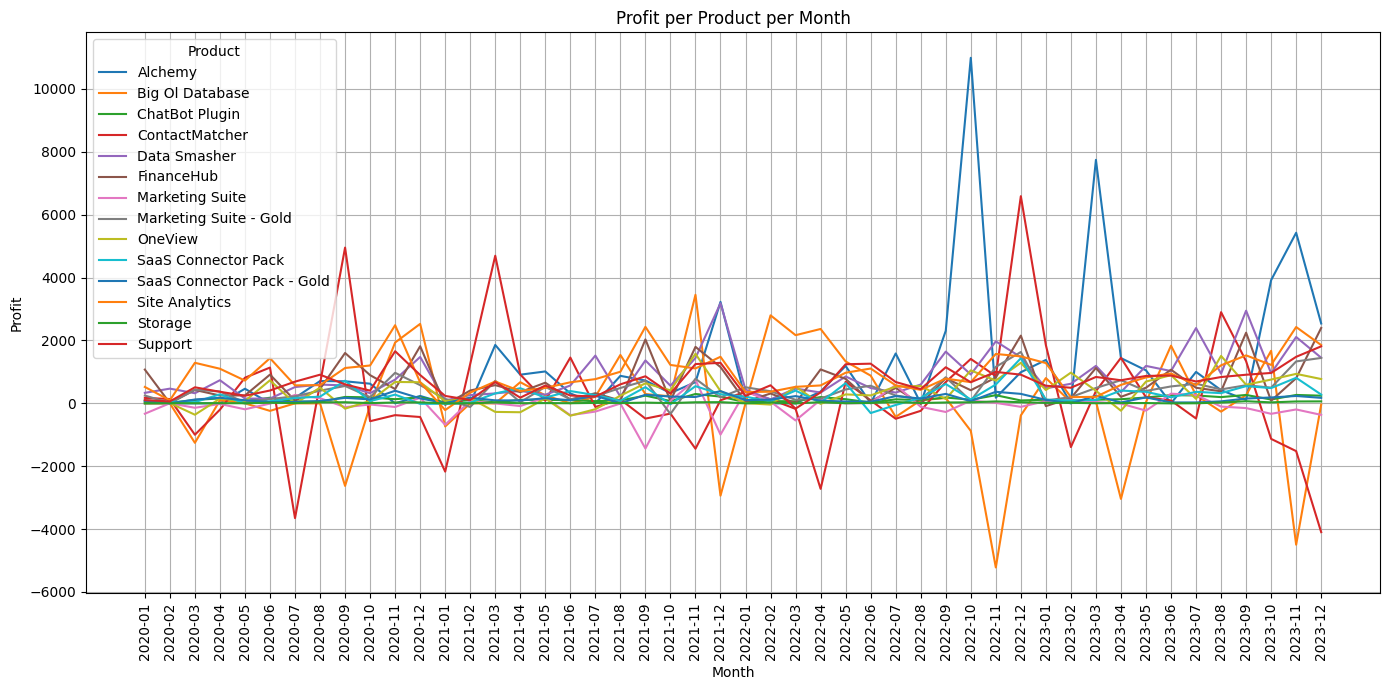

In [19]:
sales_per_month = df.groupby(['Product', 'YearMonth'])['Sales'].sum().unstack('Product').fillna(0)

# Group by product and month for Profit
profit_per_month = df.groupby(['Product', 'YearMonth'])['Profit'].sum().unstack('Product').fillna(0)

# Plot Sales per product per month
plt.figure(figsize=(14, 7))
for product in sales_per_month.columns:
    plt.plot(sales_per_month.index.astype(str), sales_per_month[product], label=product)
plt.title('Sales per Product per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Profit per product per month
plt.figure(figsize=(14, 7))
for product in profit_per_month.columns:
    plt.plot(profit_per_month.index.astype(str), profit_per_month[product], label=product)
plt.title('Profit per Product per Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* **Peak Sales Periods:**
There are noticeable spikes in sales during certain months, particularly around February, October, and December. These could indicate seasonal promotions, end-of-quarter sales pushes, or other events driving higher sales.

* **Top Products:**
Products like "Site Analytics", "FinanceHub", and "ContactMatcher" show higher sales spikes compared to others. These products might be the most popular or have higher sales during promotional periods.

* **Consistent Performers:**
Products such as "Marketing Suite" and "FinanceHub" have relatively stable but lower sales compared to the top products. This could indicate a consistent demand but less variability in sales volume.

* **Seasonality and Trends:**
The data shows a recurring pattern of sales spikes around the same months each year, suggesting seasonality in purchasing behavior. Companies might have budget cycles or strategic times for investing in new software solutions.

* **Product Performance Over Time:**
Some products show a decreasing trend over the months, while others, such as "Site Analytics", show increasing sales. This could indicate changing market preferences or the effectiveness of marketing campaigns for specific products.

In [20]:
def identify_spikes(series, threshold=1.5):
    mean = series.mean()
    std = series.std()
    spikes = series[series > mean + threshold * std]
    return spikes

sales_spikes = sales_per_month.apply(identify_spikes)

for product in sales_spikes.columns:
    print(f"Significant sales spikes for {product}:")
    print(sales_spikes[product].dropna())
    print("\n")

Significant sales spikes for Alchemy:
YearMonth
2022-10    22899.860
2023-03    18319.872
2023-10    11199.968
2023-11    12359.936
Freq: M, Name: Alchemy, dtype: float64


Significant sales spikes for Big Ol Database:
YearMonth
2020-03    25314.658
2020-09    22420.282
Freq: M, Name: Big Ol Database, dtype: float64


Significant sales spikes for ChatBot Plugin:
YearMonth
2020-12    1465.108
2021-09    1120.568
2023-11    1236.350
Freq: M, Name: ChatBot Plugin, dtype: float64


Significant sales spikes for ContactMatcher:
YearMonth
2022-12    31589.962
2023-08    17882.770
2023-10    21561.740
2023-11    18299.099
Freq: M, Name: ContactMatcher, dtype: float64


Significant sales spikes for Data Smasher:
YearMonth
2021-12    11918.920
2022-11     8081.376
2023-07     7547.336
2023-09    10227.158
2023-11     7910.368
Freq: M, Name: Data Smasher, dtype: float64


Significant sales spikes for FinanceHub:
YearMonth
2020-09    14230.721
2020-12    17750.712
2022-11    15959.530
2022-12    1

In [21]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')

spike_months = sales_spikes.stack().index.get_level_values('YearMonth').unique()
spike_data = df[df['YearMonth'].isin(spike_months)]

segment_analysis = spike_data.groupby(['Product', 'Segment'])['Sales'].sum().unstack('Segment').fillna(0)

print(segment_analysis)


Segment                     Enterprise          SMB  Strategic
Product                                                       
Alchemy                      24469.732   44619.4480  32819.676
Big Ol Database              41670.939   45856.4850  36774.879
ChatBot Plugin                2009.212    8078.7820   5338.368
ContactMatcher               49380.202  135012.5425  74271.467
Data Smasher                 21033.230   58245.8900  31512.126
FinanceHub                   38541.162  111717.6160  61588.253
Marketing Suite               4802.440   45933.1569  21236.713
Marketing Suite - Gold       26843.708   55168.9820  49533.542
OneView                       9464.194   31621.7290  24607.924
SaaS Connector Pack           9721.092   32035.5660  14655.376
SaaS Connector Pack - Gold    1797.396    4509.3300   3634.324
Site Analytics               45874.106   90419.4800  54734.390
Storage                        238.724    1164.3460    434.244
Support                      10609.166   44015.7940  24

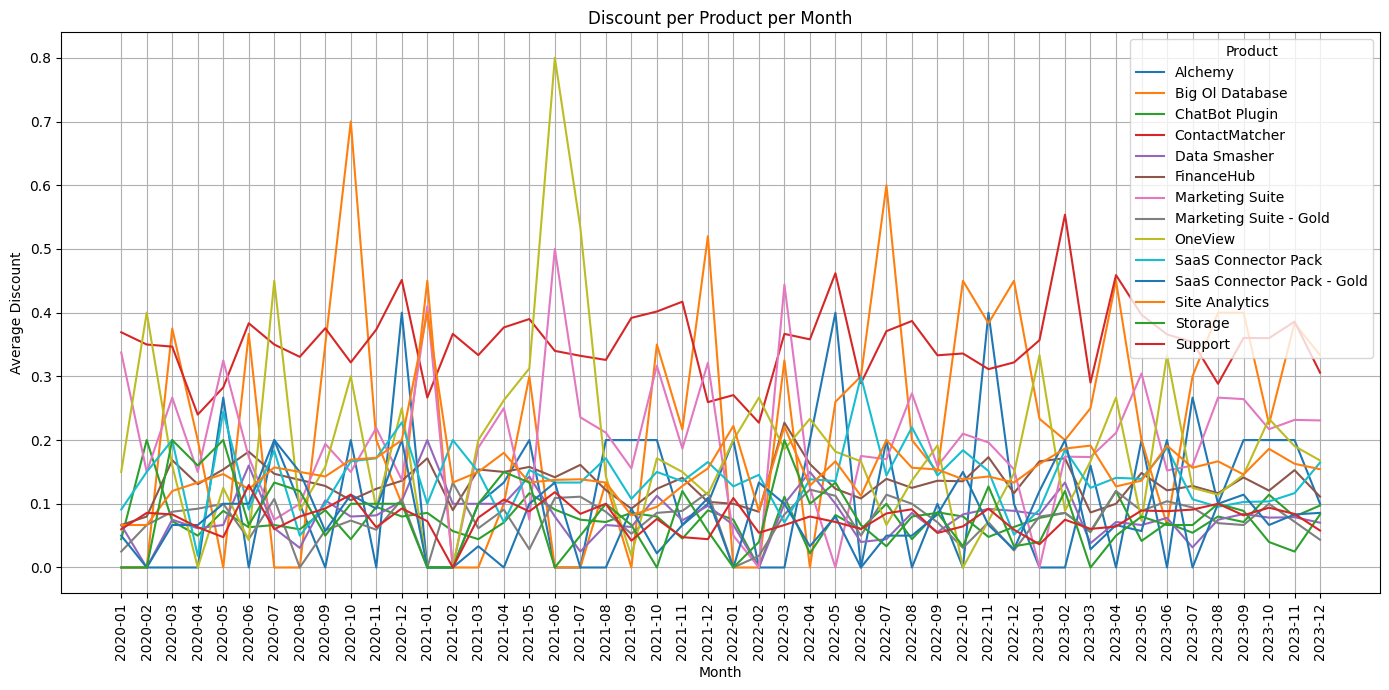

Correlation between Sales and Discount for each product:
                           Correlation
Product                               
Alchemy                       0.209607
Big Ol Database               0.224901
ChatBot Plugin               -0.005201
ContactMatcher               -0.082035
Data Smasher                 -0.098873
FinanceHub                    0.123891
Marketing Suite               0.032438
Marketing Suite - Gold       -0.048336
OneView                      -0.241861
SaaS Connector Pack          -0.216068
SaaS Connector Pack - Gold    0.020529
Site Analytics               -0.011993
Storage                        0.10052
Support                      -0.251107


In [22]:
discount_per_month = df.groupby(['Product', 'YearMonth'])['Discount'].mean().unstack('Product').fillna(0)

plt.figure(figsize=(14, 7))
for product in discount_per_month.columns:
    plt.plot(discount_per_month.index.astype(str), discount_per_month[product], label=product)
plt.title('Discount per Product per Month')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

correlation_analysis = pd.DataFrame(index=sales_per_month.columns, columns=['Correlation'])

for product in sales_per_month.columns:
    correlation_analysis.loc[product, 'Correlation'] = sales_per_month[product].corr(discount_per_month[product])

print("Correlation between Sales and Discount for each product:")
print(correlation_analysis)


###Correlation Analysis

In [23]:
numeric_df = df.select_dtypes(include=[float, int])

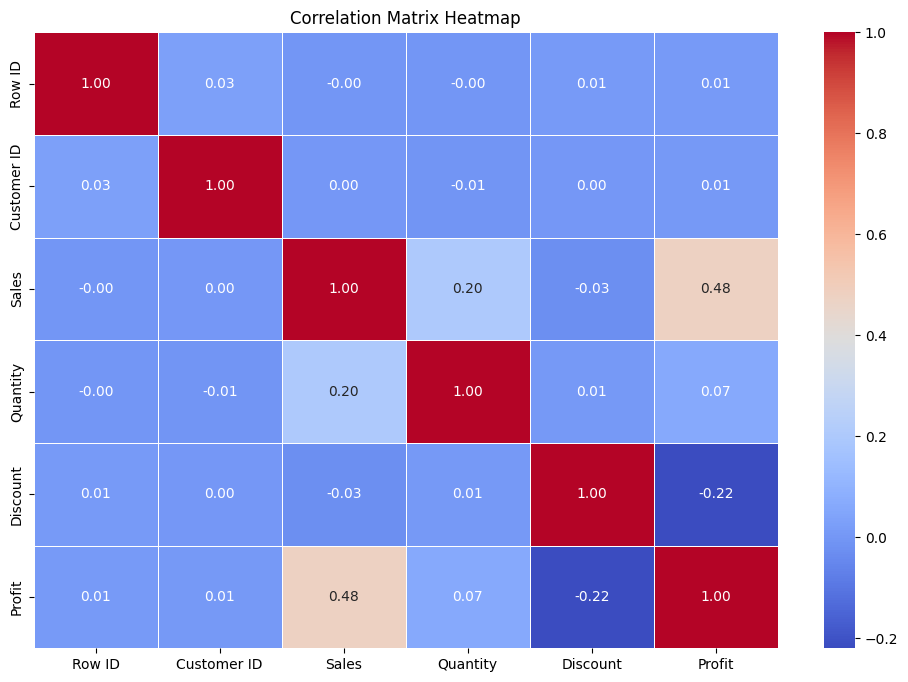

In [24]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Berdasarkan heatmap matriks korelasi yang ditampilkan, berikut adalah beberapa kesimpulan yang dapat diambil:

* Korelasi Positif antara Sales dan Profit:
Terdapat korelasi positif yang cukup signifikan antara Sales dan Profit dengan nilai korelasi sebesar 0.48. Hal ini menunjukkan bahwa ketika penjualan (sales) meningkat, profit juga cenderung meningkat. Ini adalah temuan yang wajar karena penjualan yang lebih tinggi biasanya menghasilkan keuntungan yang lebih tinggi.

* Korelasi Negatif antara Discount dan Profit:
Terdapat korelasi negatif antara Discount dan Profit dengan nilai korelasi sebesar -0.22. Ini menunjukkan bahwa peningkatan diskon biasanya dikaitkan dengan penurunan profit, yang masuk akal karena memberikan diskon dapat mengurangi margin keuntungan.

* Korelasi antara Sales dan Quantity:
Terdapat korelasi positif antara Sales dan Quantity dengan nilai korelasi sebesar 0.20. Ini menunjukkan bahwa peningkatan jumlah barang yang dijual cenderung meningkatkan penjualan total.

* Korelasi Lemah antara Kolom Lain:
Sebagian besar kolom lainnya memiliki korelasi yang sangat rendah (dekat dengan 0), menunjukkan bahwa mereka tidak memiliki hubungan linier yang kuat satu sama lain. Misalnya, Row ID, Customer ID, Order ID, dan kolom lainnya tidak menunjukkan hubungan yang signifikan dengan kolom-kolom lain.

* Korelasi Negatif antara Quantity dan Discount:
Korelasi antara Quantity dan Discount adalah -0.03, yang menunjukkan bahwa peningkatan jumlah barang yang dijual tidak berkaitan erat dengan peningkatan atau penurunan diskon yang diberikan.

Secara keseluruhan, temuan ini dapat membantu memahami bagaimana berbagai variabel berinteraksi satu sama lain dalam dataset. Informasi ini bisa digunakan untuk membuat keputusan yang lebih baik terkait penetapan harga, strategi diskon, dan fokus penjualan untuk meningkatkan profitabilitas.

###Sales and Profit by Product

In [25]:
grouped_df = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
melted_df = pd.melt(grouped_df, id_vars='Product', value_vars=['Sales', 'Profit'],
                    var_name='Metric', value_name='Value')

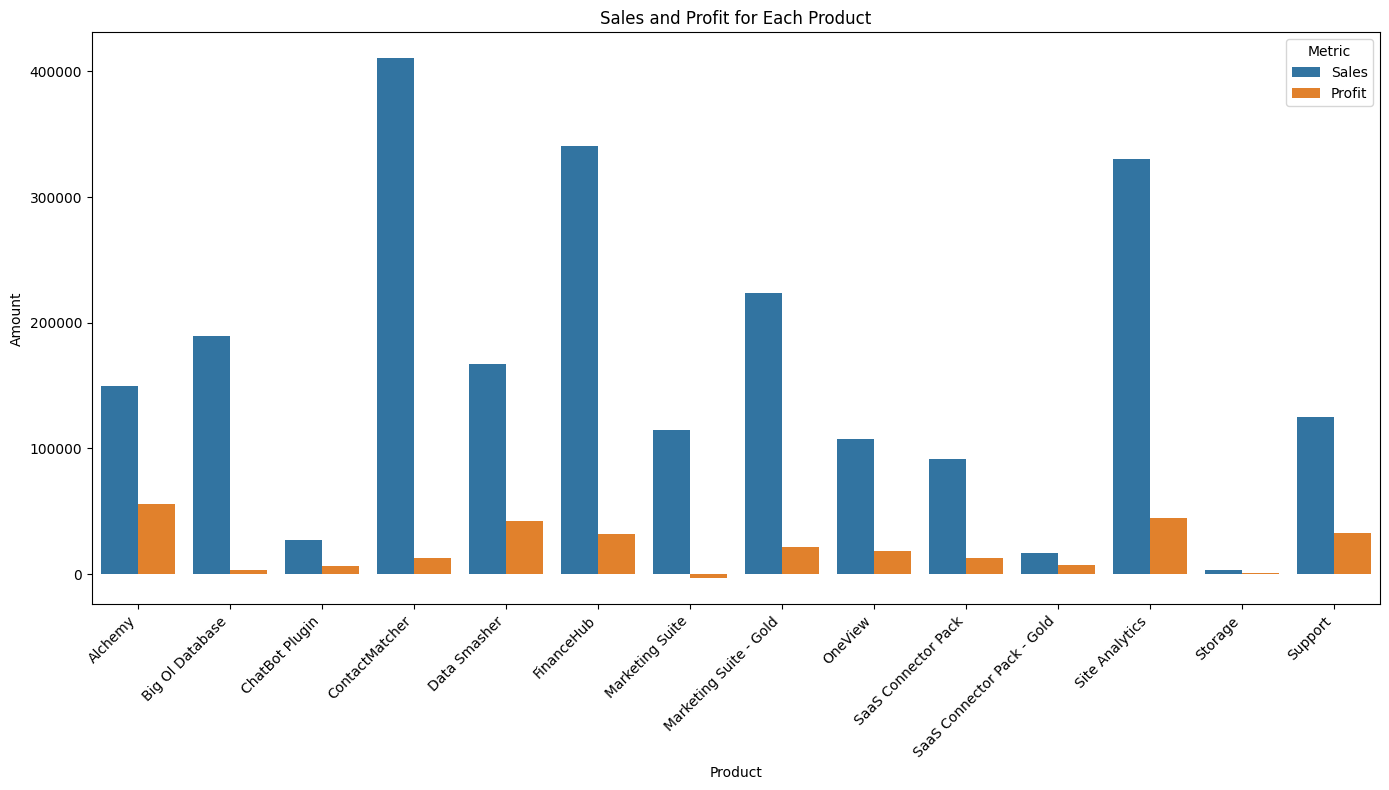

In [26]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Product', y='Value', hue='Metric', data=melted_df)

plt.xticks(rotation=45, ha='right')

plt.title('Sales and Profit for Each Product')
plt.xlabel('Product')
plt.ylabel('Amount')
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

Dari bar chart diatas dapat kita simpulan beberapa hal, antara lain:
* Contact Matcher adalah produk dengan penjualan tertinggi
* Alchemy adalah produk yang menghasilkan keuntungan tertinggi
* Dapat diambil kesimpulan awal bahwa produk dengan Penjualan tinggi bukan berarti akan memnghasilkan keuntungan yang tinggi juga

###Customer Analysis

**Sales by Segment**

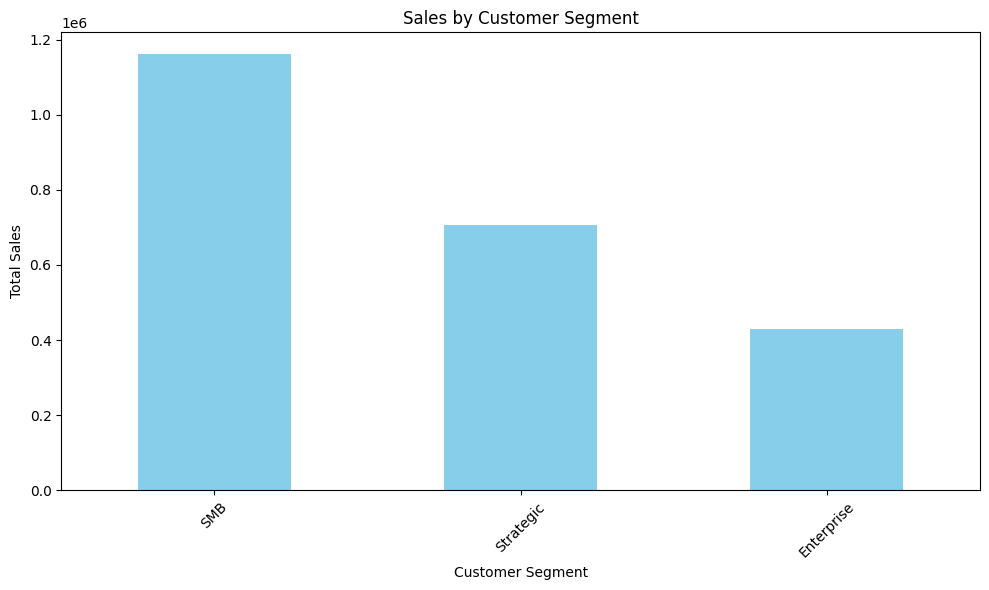

In [27]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
customer_count_by_segment = df.groupby('Segment')['Customer ID'].nunique()
customer_count_by_segment

Segment
Enterprise    76
SMB           96
Strategic     91
Name: Customer ID, dtype: int64

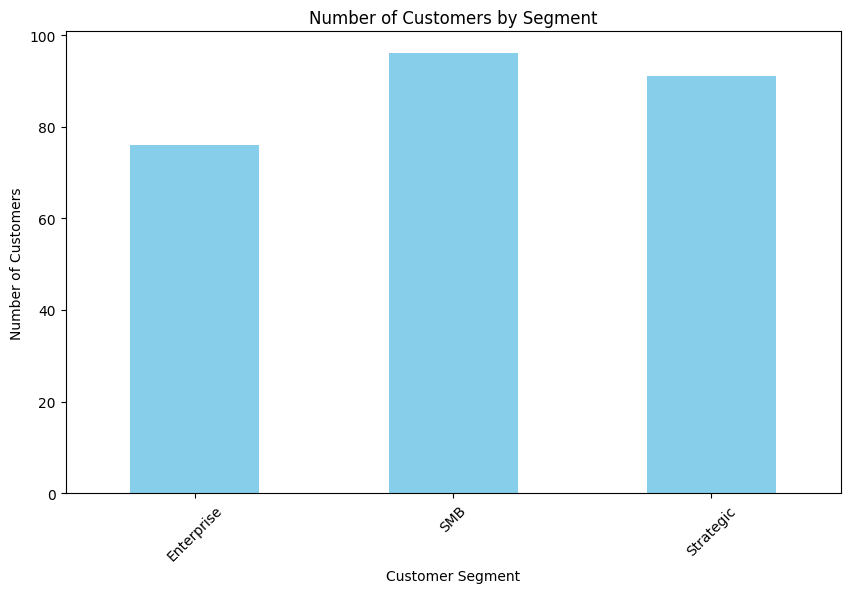

In [50]:
plt.figure(figsize=(10, 6))
customer_count_by_segment.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Segment')
plt.xticks(rotation=45)
plt.show()

In [51]:
customer_count_per_industry_segment = df.groupby(['Segment', 'Industry'])['Customer'].count().reset_index()
customer_count_per_industry_segment.rename(columns={'Customer': 'Customer Count'}, inplace=True)
customer_count_per_industry_segment

,Segment,Industry,Customer Count
0,Enterprise,Communications,90
1,Enterprise,Consumer Products,95
2,Enterprise,Energy,231
3,Enterprise,Finance,281
4,Enterprise,Healthcare,137
5,Enterprise,Manufacturing,321
6,Enterprise,Misc,68
7,Enterprise,Retail,214
8,Enterprise,Tech,256
9,Enterprise,Transportation,90


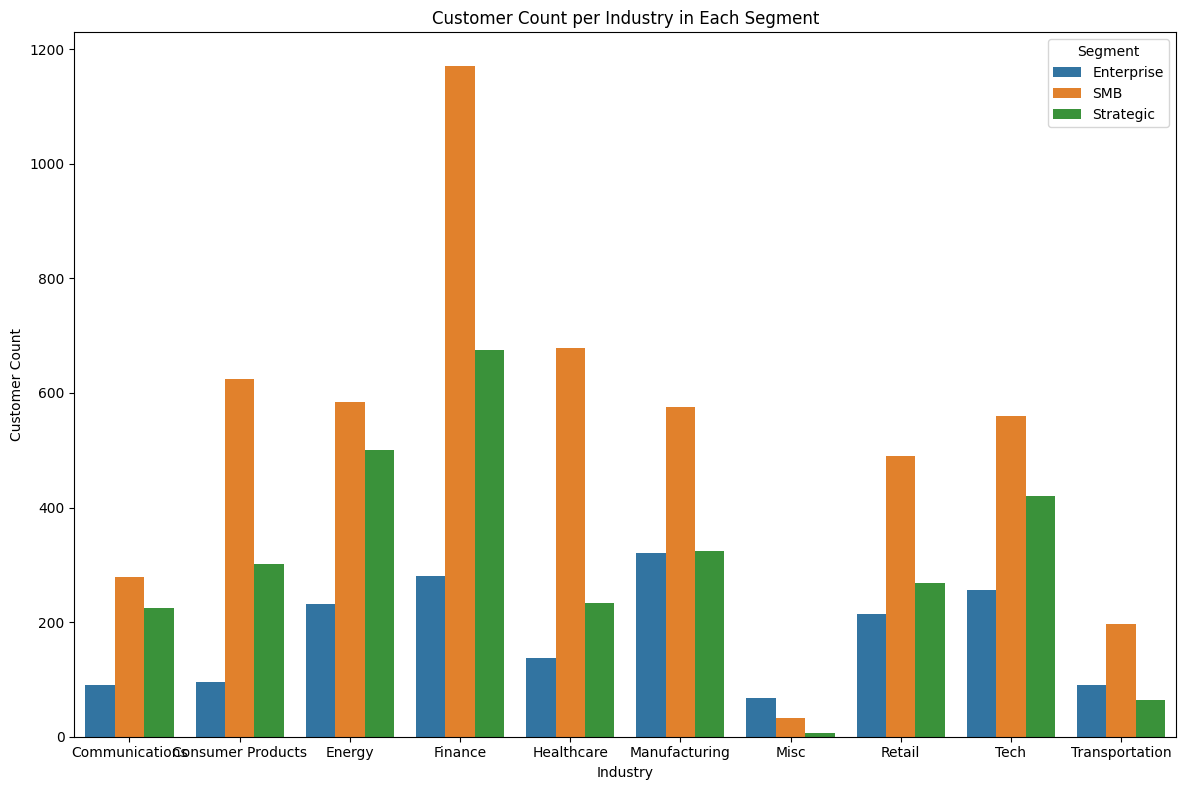

In [53]:
customer_count_per_industry_segment.rename(columns={'Customer': 'Customer Count'}, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=customer_count_per_industry_segment, x='Industry', y='Customer Count', hue='Segment')
plt.title('Customer Count per Industry in Each Segment')
plt.xlabel('Industry')
plt.ylabel('Customer Count')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

**Sales by Industry**

In [28]:
sales_per_industry = df.groupby('Industry')['Sales'].sum()
profit_per_industry = df.groupby('Industry')['Profit'].sum()

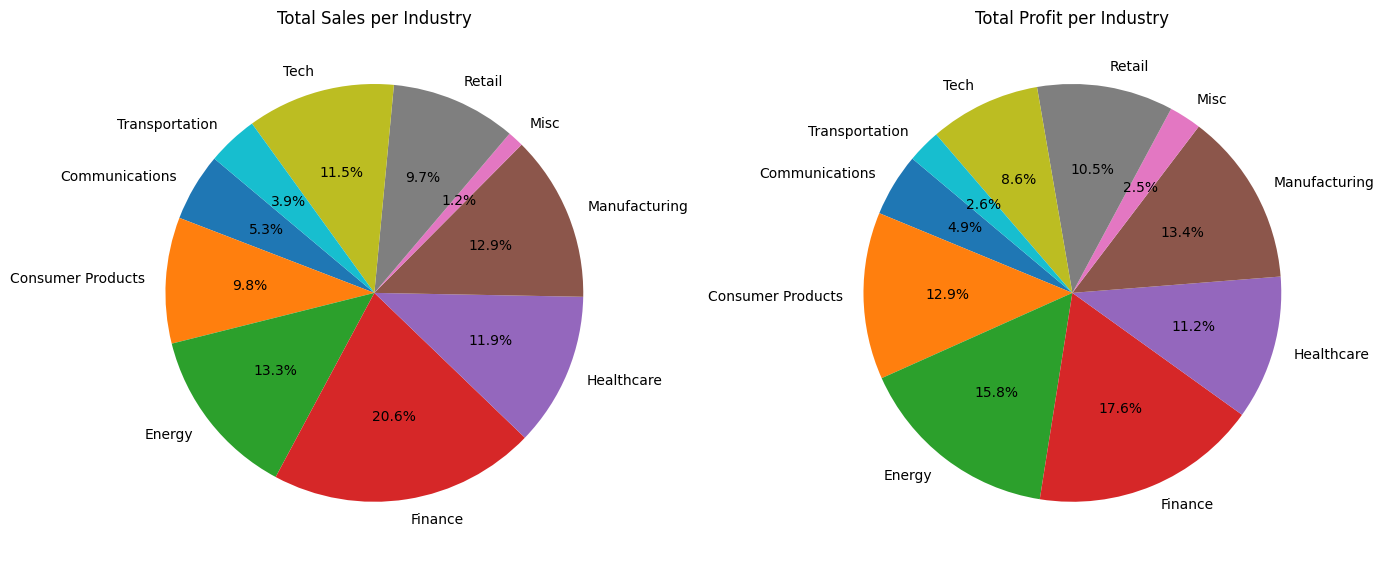

In [29]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(sales_per_industry, labels=sales_per_industry.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales per Industry')

plt.subplot(1, 2, 2)
plt.pie(profit_per_industry, labels=profit_per_industry.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Profit per Industry')

plt.tight_layout()
plt.show()

In [30]:
top_customers = df.groupby('Customer')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers

Customer
Anthem                   55719.2100
Ford Motor               43893.0424
Allianz                  42904.1670
Bank of America Corp.    41255.9471
Valero Energy            41220.4188
Lowes                    40360.1630
Tyson Foods              40326.3440
Allstate                 39941.6400
AmerisourceBergen        39234.7610
BMW                      39083.7900
Name: Sales, dtype: float64

**Top Customers**

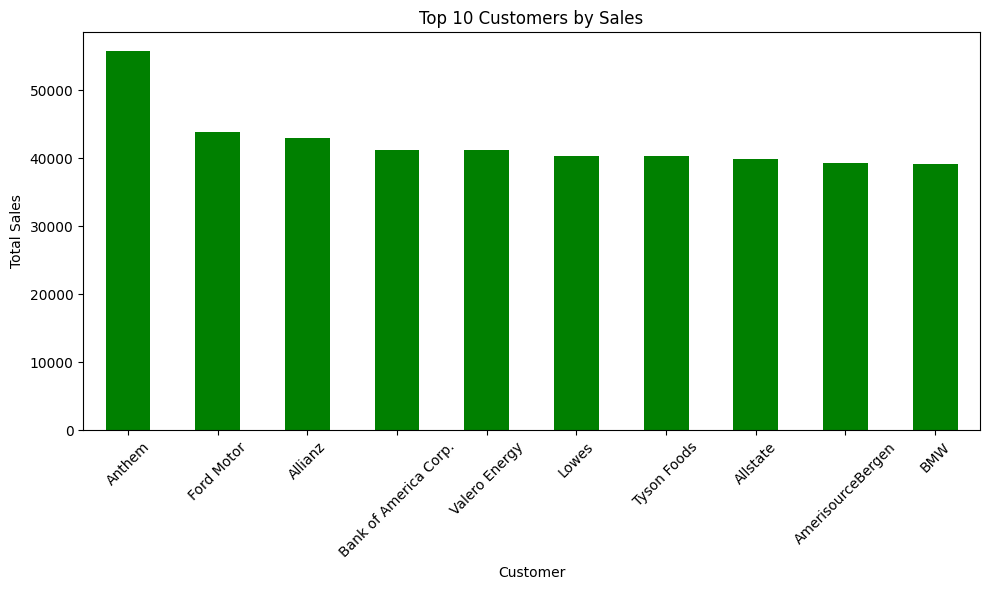

In [31]:
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Sales by Region**

In [32]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
EMEA    1.043887e+06
AMER    8.378496e+05
APJ     4.154642e+05
Name: Sales, dtype: float64

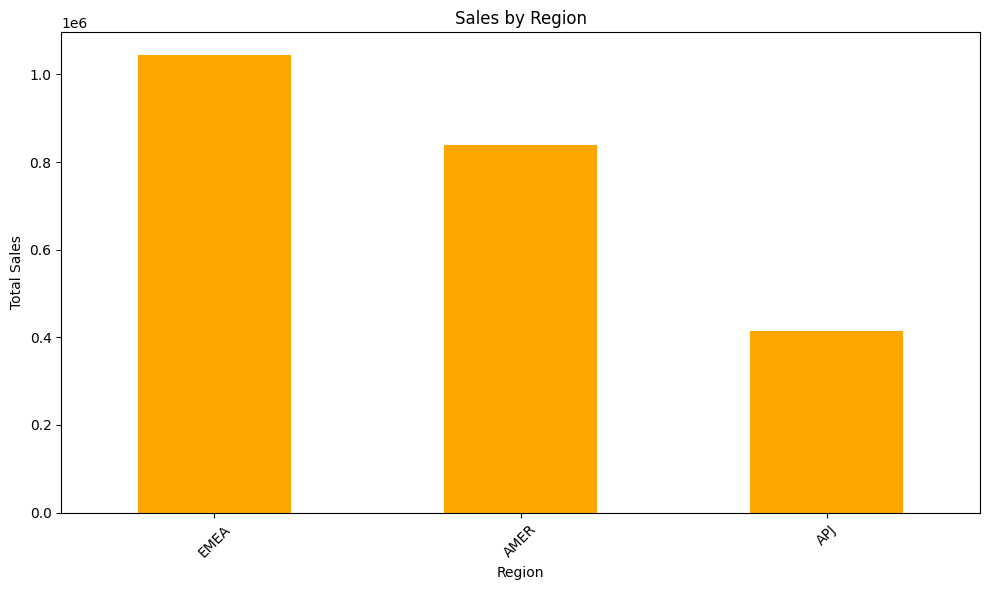

In [33]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='orange')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
subregion_sales = df.groupby('Subregion')['Sales'].sum().sort_values(ascending=False)
subregion_sales

Subregion
NAMER      596328.9015
EU-WEST    384065.6140
UKIR       347468.0210
LATAM      241520.7030
JAPN       170188.0458
NOR        127326.9600
APAC       106771.2120
ANZ         84949.6230
MEA         76793.6960
EU-EAST     76118.1140
IND         53555.3600
EU          32114.6100
Name: Sales, dtype: float64

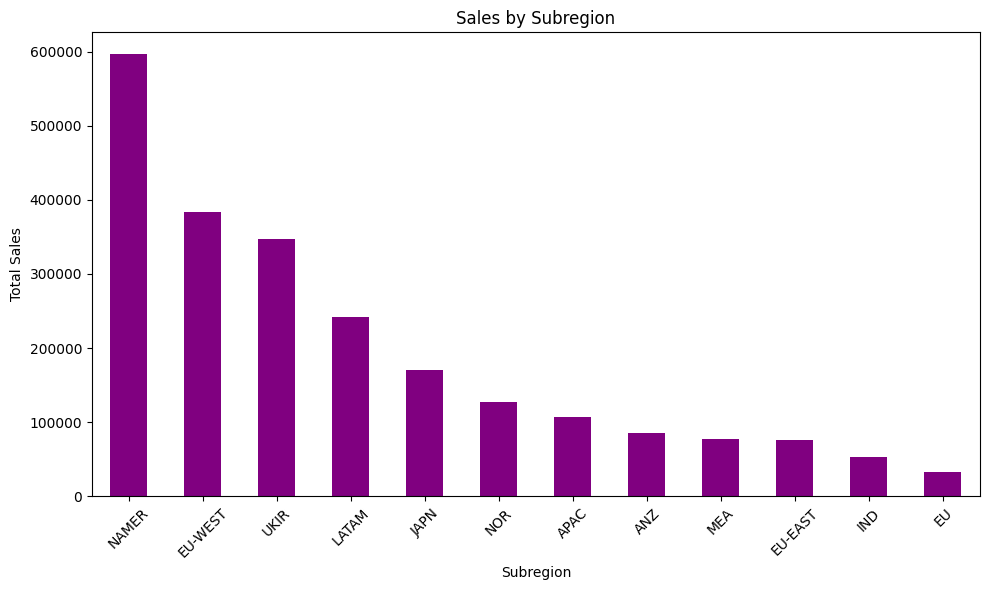

In [35]:
plt.figure(figsize=(10, 6))
subregion_sales.plot(kind='bar', color='purple')
plt.title('Sales by Subregion')
plt.xlabel('Subregion')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
Country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
Country_sales

Country
United States           457687.6315
United Kingdom          313169.8810
Japan                   170188.0458
Canada                  138641.2700
France                  116511.9140
Germany                  89473.7080
Australia                80166.1010
Mexico                   78258.1360
Brazil                   76269.6140
Spain                    70636.7200
Sweden                   55603.1640
India                    53555.3600
Finland                  49095.8400
Argentina                35764.3120
Chile                    35282.0010
Ireland                  34298.1400
Italy                    32114.6100
Russia                   32108.1180
South Africa             30661.8730
Luxembourg               29863.1500
South Korea              28634.4340
Philippines              27451.0690
China                    23705.5230
Norway                   22627.9560
Poland                   22205.1500
Singapore                19683.3900
Portugal                 19510.6400
Belgium             

In [37]:
Country_sales_top = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
Country_sales_top

Country
United States     457687.6315
United Kingdom    313169.8810
Japan             170188.0458
Canada            138641.2700
France            116511.9140
Germany            89473.7080
Australia          80166.1010
Mexico             78258.1360
Brazil             76269.6140
Spain              70636.7200
Name: Sales, dtype: float64

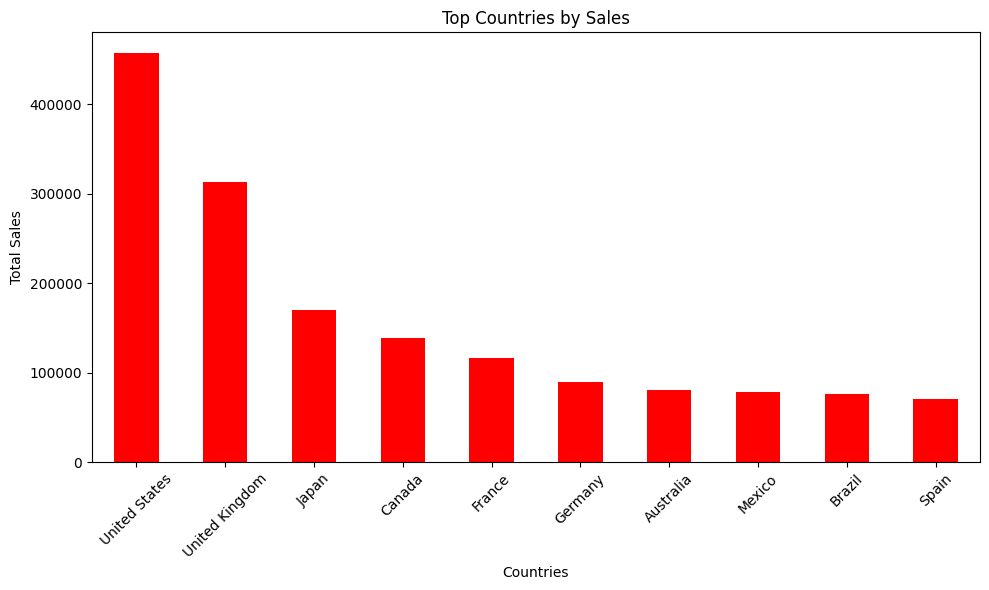

In [38]:
plt.figure(figsize=(10, 6))
Country_sales_top.plot(kind='bar', color='red')
plt.title('Top Countries by Sales')
plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
def categorize_region(row):
    if row['Country'] == 'United States':
        return 'USA'
    elif row['Country'] == 'United Kingdom':
        return 'UK'
    else:
        return 'Rest of the World'

df['Region_Group'] = df.apply(categorize_region, axis=1)

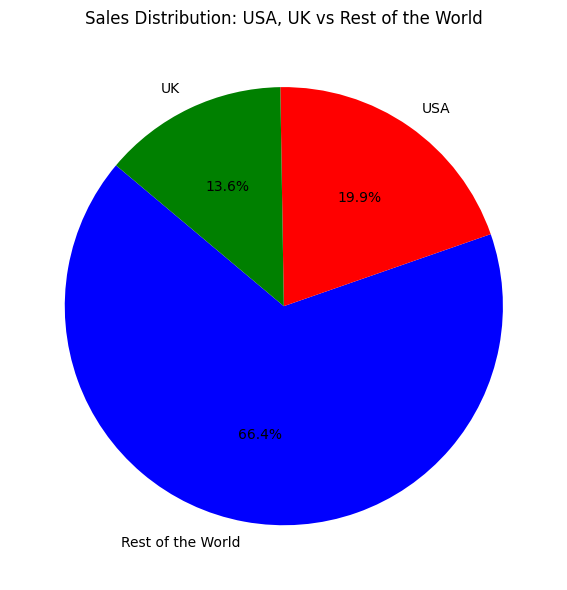

In [40]:
region_sales = df.groupby('Region_Group')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=['blue', 'red', 'green'], startangle=140)
plt.title('Sales Distribution: USA, UK vs Rest of the World')
plt.tight_layout()
plt.show()

##2024 Forecast

###Sales

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

In [43]:
model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [44]:
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_sales = pd.Series(forecast.predicted_mean.values, index=forecast_index)

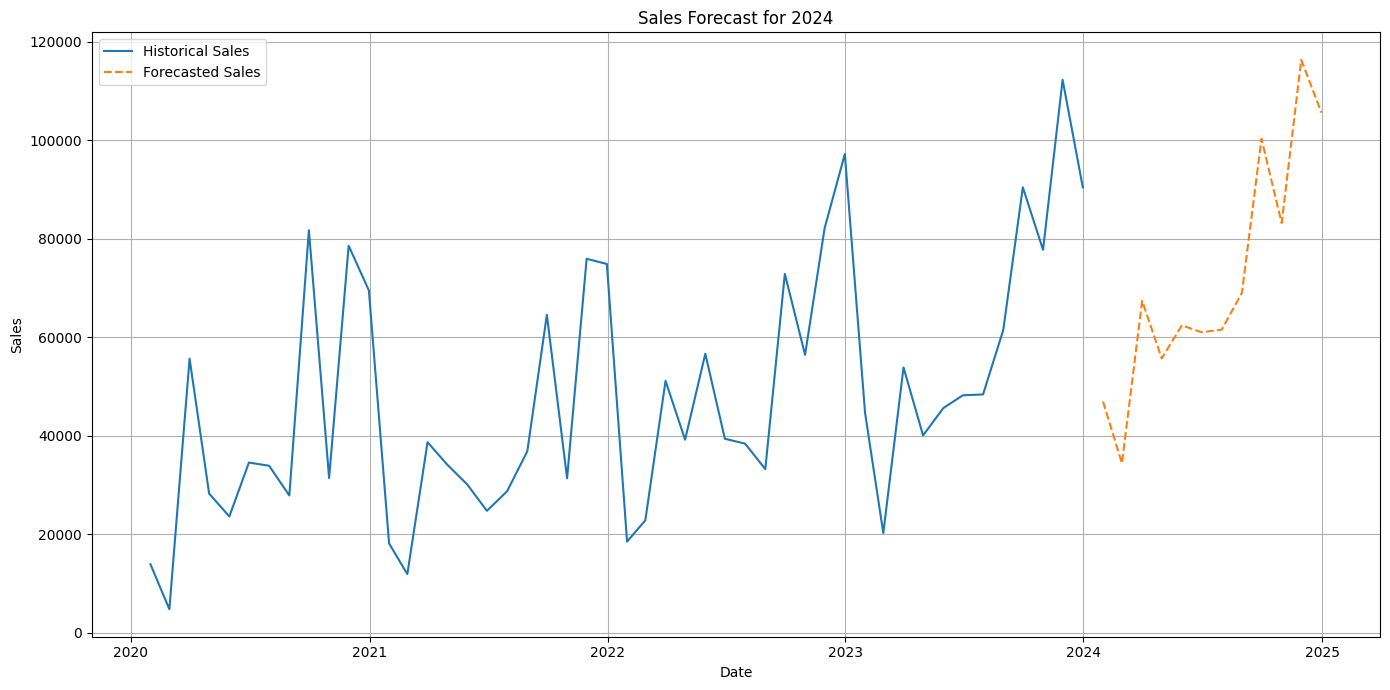

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_sales, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
total_forecasted_sales_2024 = forecast_sales.sum()
print(f"Total Forecasted Sales for 2024: ${total_forecasted_sales_2024:,.2f}")

Total Forecasted Sales for 2024: $864,370.19


In [47]:
annual_sales = df.resample('Y', on='Order Date')['Sales'].sum()

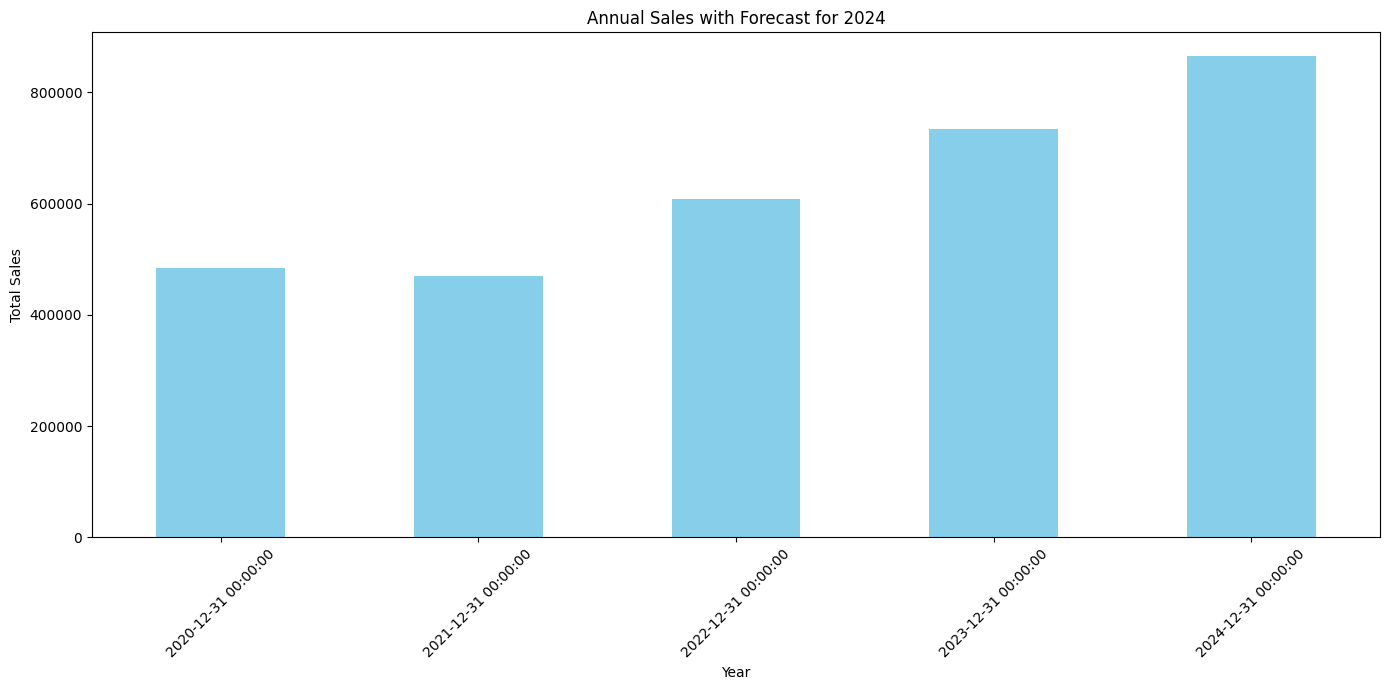

In [48]:
annual_sales.loc[datetime(2024, 12, 31)] = total_forecasted_sales_2024

plt.figure(figsize=(14, 7))
annual_sales.plot(kind='bar', color='skyblue')
plt.title('Annual Sales with Forecast for 2024')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Conclusion & Recommendation

Berdasarkan hasil analisis, dapat diambil beberapa kesimpulan, antara lain:
* Dari sales Trend berdasarkan Kategori, kita dapat melihat terdapat pattern pembelian dari customer Marketpro
* Produk terlaris adalah ContactMatcher, Site Analytics, dan FinanceHub, akan tetapi, penjualan cukup tidak stabil, dapat diakibatkan seasonal purchases.
* Produk yang paling konsisten secara penjualan adalag Marketing Suite dan Financehub.
* Berdasarkan analisis korelasi, terdapat korelasi negatif antara diskon, sales, dan profit.
* Customer segment terbesar dari marketpro adalah SMB (Small Medium Businesses)
* Sedangkan Industri terbesar adalah Finance, yang diikuti oleh Energi, Manufacturing, Healthcare, dan Tech
* Subregion terbesar adalah NAMER, dan negara dengan penjualan tertinggi adalah AS dan UK, diikuti oleh jepang dan kanada



**Rekomendasi:**
* Bagi tim Business Development berdasarkan jenis produk, dan pahami siklus penjualan, untuk produk dengan spike penjualan yang terjal, gencarkan direct marketing seperti cold-email/calls disaat sebelum terjadi spiking.
* Untuk negara-negara yang paling laris, fokus untuk menjual produk-produk yang kurang populer, sedangkan tingkatkan presence di negara yang belum terlalu banyak penjualan dengan menggencarkan pemasaran produk-produk top Marketpro seperti ContactMatcher dan Site Analytics
* Menggunakan strategi diskon tidaklah efektif untuk menghasilkan penjualan, ditandai dengan korelasi negatif antara keduanya